Import Necessary Packages and Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
xls = pd.ExcelFile('dataset.xls')

In [3]:
data = pd.read_excel(xls, 'Annual')

Preprocessing Data

In [4]:
#turning monthly data into annual
import itertools  

data2 = pd.read_excel(xls, 'Monthly')

def list_make(min, man): 
    return [item for item in range(min, max+1)]       
min, max = 1948, 2020
yearly = list_make(min, max)


#Take monthly data, average for each year, and replace for annual data
labor_level = []
for yr in yearly:
  sum = []
  counter = 0
  for (date, val) in zip(data2['DATE'], data2['CLF16OV']): 
    if date.year == yr:
      sum.append(val)
      counter += 1
    else:
      continue

  avg = np.sum(sum)/counter
  labor_level.append(avg)

print(labor_level)

#add nans where data is not available
count = 0
while count <= 22:
  labor_level.insert(count, np.nan)
  count += 1

labor_level = pd.Series(labor_level)
print('how many nans: ', np.count_nonzero(np.isnan(labor_level)))
print(labor_level)

#add new transformed data with other annual data
data = pd.concat([data, labor_level], axis=1)

data

[60634.5, 61394.75, 62121.666666666664, 62016.666666666664, 62152.666666666664, 63056.0, 63672.083333333336, 64964.333333333336, 66537.33333333333, 66942.25, 67670.08333333333, 68359.33333333333, 69658.66666666667, 70449.91666666667, 70619.41666666667, 71812.16666666667, 73077.25, 74424.0, 75744.58333333333, 77347.66666666667, 78710.41666666667, 80705.08333333333, 82796.08333333333, 84376.16666666667, 87011.0, 89410.66666666667, 91975.91666666667, 93769.83333333333, 96150.66666666667, 98984.16666666667, 102233.25, 104960.58333333333, 106974.0, 108675.91666666667, 110244.08333333333, 111515.41666666667, 113531.83333333333, 115467.41666666667, 117845.58333333333, 119852.83333333333, 121670.66666666667, 123850.66666666667, 125856.66666666667, 126352.41666666667, 128099.08333333333, 129185.33333333333, 131046.66666666667, 132315.16666666666, 133951.25, 136301.0, 137679.83333333334, 139379.91666666666, 142585.75, 143768.91666666666, 144856.08333333334, 146499.5, 147379.58333333334, 149289.1

,DATE,GDPA,M1NTOTL1IP000,M1TTOTL1ES000,M1YTOTL1IP000,MKTGDPCNA646NWDB,RKNANPCNA666NRUG,RKNANPUSA666NRUG,RTFPNACNA632NRUG,RTFPNAUSA632NRUG,Y006RC1A027NBEA,Y009RC1A027NBEA,Y061RC1A027NBEA,Y694RC1A027NBEA,Y695RC1A027NBEA,0
0,1925-01-01,NaN,0.3,8.9,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-01-01,NaN,0.3,9.4,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1927-01-01,NaN,0.3,9.8,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1928-01-01,NaN,0.3,10.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1929-01-01,104.556,0.3,10.4,0.4,NaN,NaN,NaN,NaN,NaN,0.189,NaN,0.033,0.251,104.306,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2016-01-01,18745.075,689.6,2986.6,876.0,1.123328e+13,87069408.0,55412212.0,1.028022,1.022072,403.362,70.413,127.029,549.511,18195.565,159196.083333
92,2017-01-01,19542.980,733.5,3112.8,925.7,1.231041e+13,94903728.0,56215312.0,1.037417,1.030535,419.971,72.532,132.149,572.104,18970.875,160312.333333
93,2018-01-01,20611.861,785.7,3265.1,985.7,1.389482e+13,NaN,NaN,NaN,NaN,461.305,83.207,135.682,617.590,19994.271,162068.083333
94,2019-01-01,21433.226,844.0,3420.8,1052.0,1.434290e+13,NaN,NaN,NaN,NaN,501.889,89.800,145.773,669.138,20764.088,163517.250000


In [5]:
data.head()

,DATE,GDPA,M1NTOTL1IP000,M1TTOTL1ES000,M1YTOTL1IP000,MKTGDPCNA646NWDB,RKNANPCNA666NRUG,RKNANPUSA666NRUG,RTFPNACNA632NRUG,RTFPNAUSA632NRUG,Y006RC1A027NBEA,Y009RC1A027NBEA,Y061RC1A027NBEA,Y694RC1A027NBEA,Y695RC1A027NBEA,0
0,1925-01-01,NaN,0.3,8.9,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-01-01,NaN,0.3,9.4,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1927-01-01,NaN,0.3,9.8,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1928-01-01,NaN,0.3,10.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1929-01-01,104.556,0.3,10.4,0.4,NaN,NaN,NaN,NaN,NaN,0.189,NaN,0.033,0.251,104.306,NaN


In [6]:
#drop nans to leave rows with full data
data.dropna(inplace=True)
data.isnull().values.any()
#sns.heatmap(data.isnull())

False

In [7]:
#address columns and turn date into years
years = []

for date in data['DATE']:
  years.append(date.year)

data['DATE'] = years

data

,DATE,GDPA,M1NTOTL1IP000,M1TTOTL1ES000,M1YTOTL1IP000,MKTGDPCNA646NWDB,RKNANPCNA666NRUG,RKNANPUSA666NRUG,RTFPNACNA632NRUG,RTFPNAUSA632NRUG,Y006RC1A027NBEA,Y009RC1A027NBEA,Y061RC1A027NBEA,Y694RC1A027NBEA,Y695RC1A027NBEA,0
35,1960,542.382,5.3,67.9,10.3,5.971647e+10,1.000979e+06,12368243.0,0.635934,0.717179,4.867,0.167,7.610,12.659,529.722,69658.666667
36,1961,562.210,5.8,70.6,11.4,5.005687e+10,1.031338e+06,12783005.0,0.521770,0.723983,5.160,0.187,8.552,13.915,548.294,70449.916667
37,1962,603.921,6.3,74.1,12.4,4.720936e+10,1.040694e+06,13249005.0,0.552029,0.740099,5.591,0.201,9.574,15.393,588.529,70619.416667
38,1963,637.451,6.8,78.0,13.6,5.070680e+10,1.068012e+06,13754964.0,0.620408,0.750947,5.987,0.218,11.337,17.580,619.871,71812.166667
39,1964,684.460,7.5,82.4,15.0,5.970834e+10,1.113208e+06,14311738.0,0.679566,0.763032,6.485,0.210,12.499,19.269,665.191,73077.250000
40,1965,742.289,8.2,88.0,16.3,7.043627e+10,1.180167e+06,14924471.0,0.718148,0.775131,7.218,0.254,13.315,20.851,721.438,74424.000000
41,1966,813.414,9.1,95.3,17.9,7.672029e+10,1.266846e+06,15578921.0,0.702056,0.786937,8.084,0.305,14.786,23.231,790.183,75744.583333
42,1967,859.958,10.1,103.6,19.8,7.288163e+10,1.320386e+06,16194776.0,0.675129,0.783374,8.987,0.343,15.450,24.849,835.109,77347.666667
43,1968,940.651,11.5,113.4,22.1,7.084654e+10,1.371904e+06,16826678.0,0.627842,0.793702,9.925,0.402,16.204,26.589,914.062,78710.416667
44,1969,1017.615,13.0,124.9,24.8,7.970591e+10,1.433971e+06,17452998.0,0.655547,0.788181,10.982,0.449,16.666,28.165,989.450,80705.083333


In [8]:
#fix index
data.reset_index(inplace = True)
data

,index,DATE,GDPA,M1NTOTL1IP000,M1TTOTL1ES000,M1YTOTL1IP000,MKTGDPCNA646NWDB,RKNANPCNA666NRUG,RKNANPUSA666NRUG,RTFPNACNA632NRUG,RTFPNAUSA632NRUG,Y006RC1A027NBEA,Y009RC1A027NBEA,Y061RC1A027NBEA,Y694RC1A027NBEA,Y695RC1A027NBEA,0
0,35,1960,542.382,5.3,67.9,10.3,5.971647e+10,1.000979e+06,12368243.0,0.635934,0.717179,4.867,0.167,7.610,12.659,529.722,69658.666667
1,36,1961,562.210,5.8,70.6,11.4,5.005687e+10,1.031338e+06,12783005.0,0.521770,0.723983,5.160,0.187,8.552,13.915,548.294,70449.916667
2,37,1962,603.921,6.3,74.1,12.4,4.720936e+10,1.040694e+06,13249005.0,0.552029,0.740099,5.591,0.201,9.574,15.393,588.529,70619.416667
3,38,1963,637.451,6.8,78.0,13.6,5.070680e+10,1.068012e+06,13754964.0,0.620408,0.750947,5.987,0.218,11.337,17.580,619.871,71812.166667
4,39,1964,684.460,7.5,82.4,15.0,5.970834e+10,1.113208e+06,14311738.0,0.679566,0.763032,6.485,0.210,12.499,19.269,665.191,73077.250000
5,40,1965,742.289,8.2,88.0,16.3,7.043627e+10,1.180167e+06,14924471.0,0.718148,0.775131,7.218,0.254,13.315,20.851,721.438,74424.000000
6,41,1966,813.414,9.1,95.3,17.9,7.672029e+10,1.266846e+06,15578921.0,0.702056,0.786937,8.084,0.305,14.786,23.231,790.183,75744.583333
7,42,1967,859.958,10.1,103.6,19.8,7.288163e+10,1.320386e+06,16194776.0,0.675129,0.783374,8.987,0.343,15.450,24.849,835.109,77347.666667
8,43,1968,940.651,11.5,113.4,22.1,7.084654e+10,1.371904e+06,16826678.0,0.627842,0.793702,9.925,0.402,16.204,26.589,914.062,78710.416667
9,44,1969,1017.615,13.0,124.9,24.8,7.970591e+10,1.433971e+06,17452998.0,0.655547,0.788181,10.982,0.449,16.666,28.165,989.450,80705.083333


In [9]:
data = data.drop(columns = 'index')
data.columns

Index([            'DATE',             'GDPA',    'M1NTOTL1IP000',
          'M1TTOTL1ES000',    'M1YTOTL1IP000', 'MKTGDPCNA646NWDB',
       'RKNANPCNA666NRUG', 'RKNANPUSA666NRUG', 'RTFPNACNA632NRUG',
       'RTFPNAUSA632NRUG',  'Y006RC1A027NBEA',  'Y009RC1A027NBEA',
        'Y061RC1A027NBEA',  'Y694RC1A027NBEA',  'Y695RC1A027NBEA',
                        0],
      dtype='object')

In [10]:
columns = ['year', 'GDP_usa', 'pvt_dep_ip', 'dep_fa', 'pvt_govt_dep_ip', 'GDP_china', 'k_stock_china', 'k_stock_usa', 'TFP_china', 'TFP_usa', 'pvt_invest_rd', 'pvt_invest_med_manu', 'gov_invest_rd', 'rd_gdp', 'non_rd_gdp', 'labor_level']
data.columns = columns
data.columns

Index(['year', 'GDP_usa', 'pvt_dep_ip', 'dep_fa', 'pvt_govt_dep_ip',
       'GDP_china', 'k_stock_china', 'k_stock_usa', 'TFP_china', 'TFP_usa',
       'pvt_invest_rd', 'pvt_invest_med_manu', 'gov_invest_rd', 'rd_gdp',
       'non_rd_gdp', 'labor_level'],
      dtype='object')

In [11]:
#summary statistics of variables
data.describe()

,year,GDP_usa,pvt_dep_ip,dep_fa,pvt_govt_dep_ip,GDP_china,k_stock_china,k_stock_usa,TFP_china,TFP_usa,pvt_invest_rd,pvt_invest_med_manu,gov_invest_rd,rd_gdp,non_rd_gdp,labor_level
count,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1988.500000,6991.237759,205.558621,1067.803448,281.820690,1.970341e+12,1.730900e+07,3.244223e+07,0.716293,0.868847,124.047052,19.137845,63.010379,193.267724,6797.970017,118653.125000
std,16.886879,5875.934168,219.366467,940.402058,277.388184,3.335302e+12,2.388577e+07,1.370514e+07,0.148305,0.092422,122.126581,23.365089,42.059657,168.843259,5707.337728,29578.529150
min,1960.000000,542.382000,5.300000,67.900000,10.300000,4.720936e+10,1.000979e+06,1.236824e+07,0.521770,0.717179,4.867000,0.167000,7.610000,12.659000,529.722000,69658.666667
25%,1974.250000,1580.158250,22.675000,214.725000,42.050000,1.455218e+11,2.107762e+06,2.057123e+07,0.621066,0.790465,16.670750,0.882500,19.497500,37.056500,1543.101000,92424.395833
50%,1988.500000,5439.009000,109.750000,811.350000,183.050000,3.300608e+11,6.098199e+06,3.091539e+07,0.677771,0.849870,80.231000,6.403500,67.561000,153.117000,5285.892000,122760.666667
75%,2002.750000,11327.789000,360.375000,1703.900000,474.225000,1.612853e+12,2.107325e+07,4.444711e+07,0.738215,0.958059,202.275750,33.083000,96.917750,307.046750,11020.742500,146088.645833
max,2017.000000,19542.980000,733.500000,3112.800000,925.700000,1.231041e+13,9.490373e+07,5.621531e+07,1.037417,1.030535,419.971000,72.532000,132.149000,572.104000,18970.875000,160312.333333


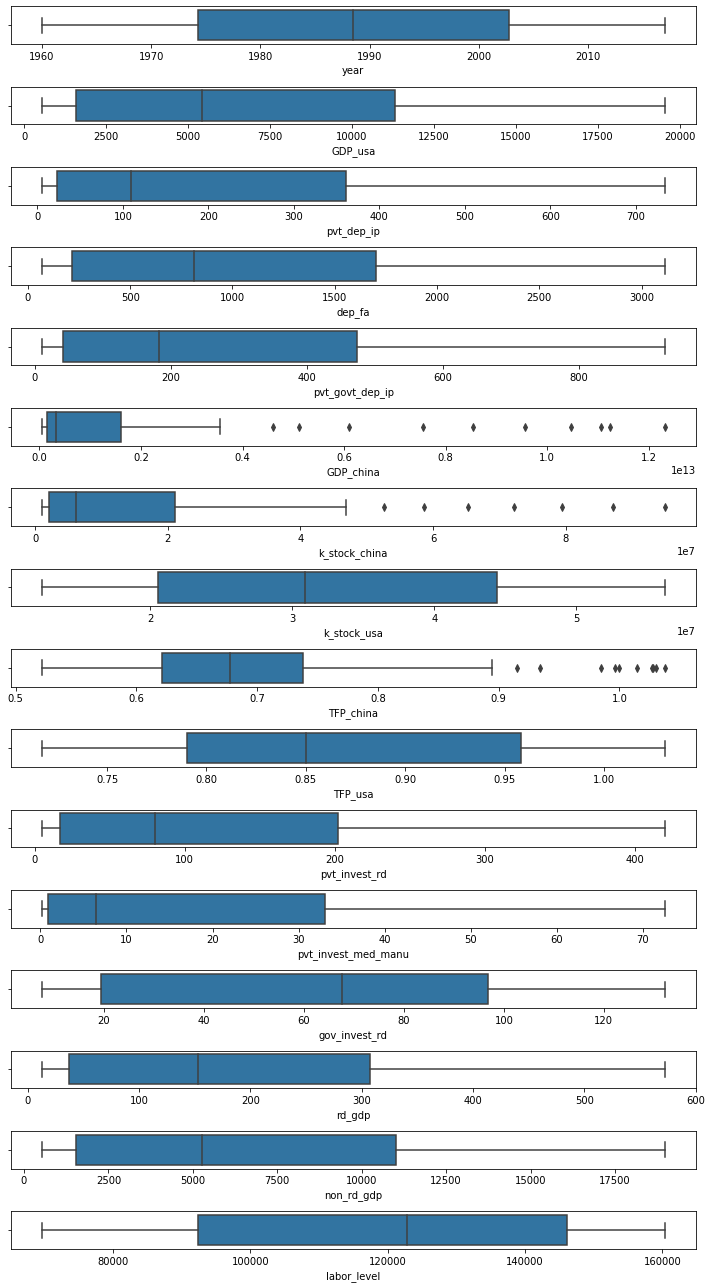

In [12]:
#distribution of data
fig,axes = plt.subplots(16, 1, figsize = (10, 18))
counter = 0
for col in data.columns:
  sns.boxplot(x = data[col], ax = axes[counter])
#  axes[counter].title.set_text(col)
  counter += 1
plt.tight_layout()

Testing predictive power of TFP and capital stock in predicting GDP for both USA and China

Linear Regression for USA
R^2 score on training: 0.9780099365638998
R^2 score on testing: 0.9458946932833978


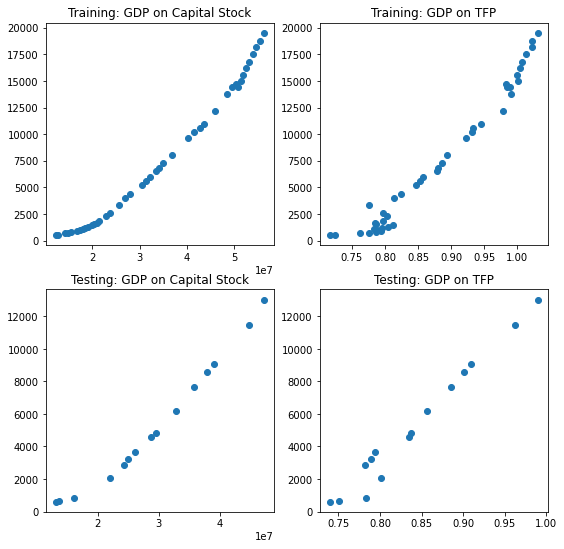

In [13]:
#TTS
X_usa = data[['TFP_usa', 'k_stock_usa']]
y_usa = data['GDP_usa']

X_train_usa, X_test_usa, y_train_usa, y_test_usa = train_test_split(X_usa, y_usa, random_state = 10)

#Linear Regression
model = LinearRegression()
model.fit(X_train_usa, y_train_usa)
y_model_train_usa = model.predict(X_train_usa)
y_model_test_usa = model.predict(X_test_usa)

#R^2 values for training and testing 
print('Linear Regression for USA')
print('R^2 score on training: ' + str(model.score(X_train_usa, y_train_usa)))
print('R^2 score on testing: ' + str(model.score(X_test_usa, y_test_usa)))

#creating figures and plotting for each feature
fig, axes = plt.subplots(2, 2, figsize = [9, 9])
axes = axes.flatten()

axes[0].set_title('Training: GDP on Capital Stock')
axes[0].scatter(X_train_usa['k_stock_usa'], y_train_usa)

axes[1].set_title('Training: GDP on TFP')
axes[1].scatter(X_train_usa['TFP_usa'], y_train_usa)

axes[2].set_title('Testing: GDP on Capital Stock')
axes[2].scatter(X_test_usa['k_stock_usa'], y_test_usa)

axes[3].set_title('Testing: GDP on TFP')
axes[3].scatter(X_test_usa['TFP_usa'], y_test_usa)


In [14]:
#using statsmodels for regression statistics
import statsmodels.api as sm
model = sm.OLS(y_usa, X_usa)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                GDP_usa   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2227.
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                    4.27e-54
Time:                        02:19:08   Log-Likelihood:                         -483.75
No. Observations:                  58   AIC:                                      971.5
Df Residuals:                      56   BIC:                                      975.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

linear regression for China
R^2 score on training: 0.9811520715119865
R^2 score on testing: 0.9818432053576652


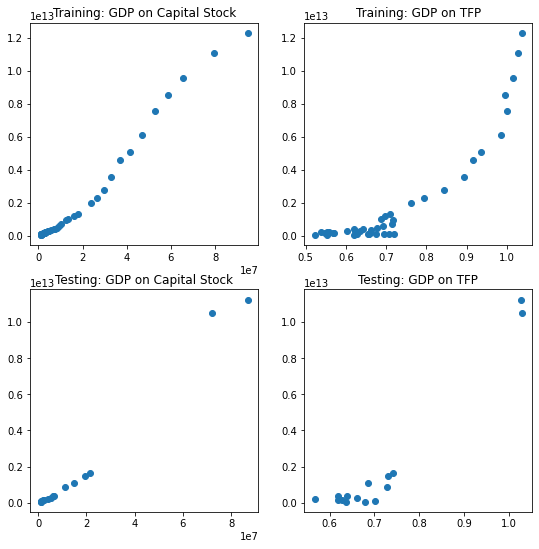

In [15]:
#TTS
X_china = data[['TFP_china', 'k_stock_china']]
y_china = data['GDP_china']

X_train_china, X_test_china, y_train_china, y_test_china = train_test_split(X_china, y_china, random_state = 13)

#Linear Regression
model = LinearRegression()
model.fit(X_train_china, y_train_china)
y_model_train_china = model.predict(X_train_china)
y_model_test_china = model.predict(X_test_china)

#R^2
print('linear regression for China')
print('R^2 score on training: ' + str(model.score(X_train_china, y_train_china)))
print('R^2 score on testing: ' + str(model.score(X_test_china, y_test_china)))

#creating figure and plotting 
fig, axes = plt.subplots(2, 2, figsize = [9, 9])
axes = axes.flatten()

axes[0].set_title('Training: GDP on Capital Stock')
axes[0].scatter(X_train_china['k_stock_china'], y_train_china)

axes[1].set_title('Training: GDP on TFP')
axes[1].scatter(X_train_china['TFP_china'], y_train_china)

axes[2].set_title('Testing: GDP on Capital Stock')
axes[2].scatter(X_test_china['k_stock_china'], y_test_china)

axes[3].set_title('Testing: GDP on TFP')
axes[3].scatter(X_test_china['TFP_china'], y_test_china)


In [16]:
model = sm.OLS(y_china, X_china)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              GDP_china   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2000.
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                    8.37e-53
Time:                        02:19:08   Log-Likelihood:                         -1638.9
No. Observations:                  58   AIC:                                      3282.
Df Residuals:                      56   BIC:                                      3286.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Creating linear regression to predict TFP

In [17]:
#linear regression for TFP using all variables
X_tfp = data[['rd_gdp', 'non_rd_gdp', 'dep_fa', 'pvt_invest_med_manu', 'gov_invest_rd', 'labor_level', 'pvt_invest_rd', 'pvt_dep_ip', 'pvt_govt_dep_ip']]
y_tfp = data['TFP_usa']

#TTS
X_train, X_test, y_train, y_test = train_test_split(X_tfp, y_tfp, random_state = 13)

#fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_model_train = model.predict(X_train)
y_model_test = model.predict(X_test)

#printing linear equation and descriptive stats
print('mean of tfp: ', np.mean(y_tfp))
print('median of tfp: ', np.median(y_tfp))
print('std of tfp: ', np.std(y_tfp))

#R^2
print('linear regression for TFP')
print('R^2 score on training: ' + str(model.score(X_train, y_train)))
print('R^2 score on testing: ' + str(model.score(X_test, y_test)))

mean of tfp:  0.8688470207411667
median of tfp:  0.8498698174953461
std of tfp:  0.09162188517115943
linear regression for TFP
R^2 score on training: 0.990954377278417
R^2 score on testing: 0.971877122256971


In [18]:
model = sm.OLS(y_tfp, X_tfp)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                TFP_usa   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              3805.
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                    1.67e-66
Time:                        02:19:08   Log-Likelihood:                          115.51
No. Observations:                  58   AIC:                                     -213.0
Df Residuals:                      49   BIC:                                     -194.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

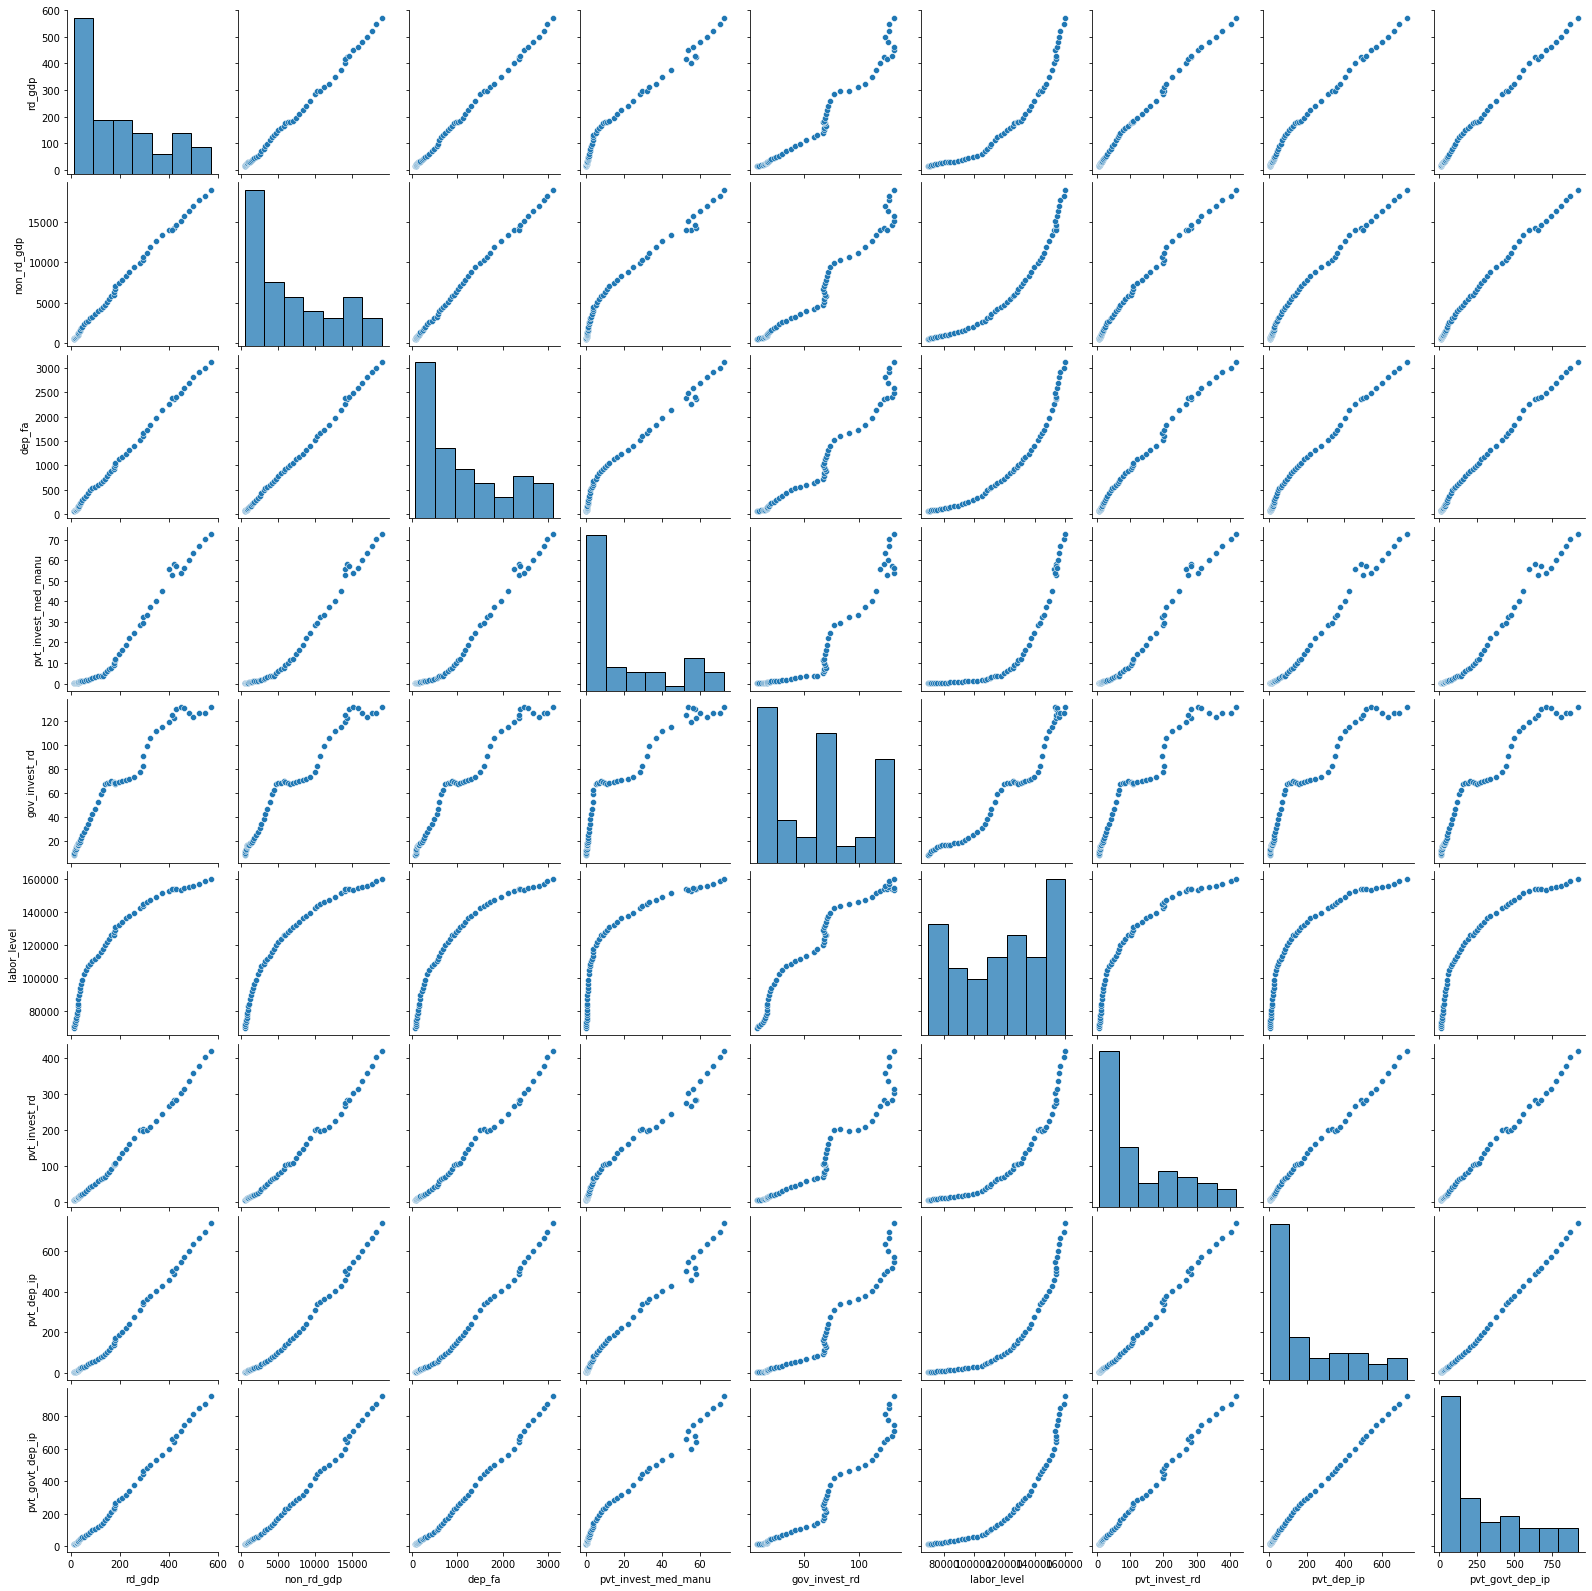

In [19]:
#searching plots for multicollinearity
sns.pairplot(X_tfp)

In [20]:
#addressing multicollinearity by reducing features

#linear regression for TFP
X_tfp_red = data[['rd_gdp', 'pvt_invest_rd', 'pvt_govt_dep_ip']]
y_tfp = data['TFP_usa']

#TTS
X_train, X_test, y_train, y_test = train_test_split(X_tfp_red, y_tfp, random_state = 12)

#fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_model_train = model.predict(X_train)
y_model_test = model.predict(X_test)

#printing descriptive stats of y
print('mean of tfp: ', np.mean(y_tfp))
print('median of tfp: ', np.median(y_tfp))
print('std of tfp: ', np.std(y_tfp))

#R^2
print('linear regression for TFP')
print('R^2 score on training: ' + str(model.score(X_train, y_train)))
print('R^2 score on testing: ' + str(model.score(X_test, y_test)))

mean of tfp:  0.8688470207411667
median of tfp:  0.8498698174953461
std of tfp:  0.09162188517115943
linear regression for TFP
R^2 score on training: 0.9554184362441404
R^2 score on testing: 0.9580887411331575


In [21]:
model = sm.OLS(y_tfp, X_tfp_red)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                TFP_usa   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              126.3
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                    1.21e-24
Time:                        02:19:41   Log-Likelihood:                         -14.569
No. Observations:                  58   AIC:                                      35.14
Df Residuals:                      55   BIC:                                      41.32
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [22]:
#theory and data model

#linear regression for TFP
X_tfp_theory = data[['rd_gdp', 'labor_level']]
y_tfp = data['TFP_usa']

#TTS
X_train, X_test, y_train, y_test = train_test_split(X_tfp_theory, y_tfp, random_state = 12)

#fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_model_train = model.predict(X_train)
y_model_test = model.predict(X_test)

#printing descriptive stats of y
print('mean of tfp: ', np.mean(y_tfp))
print('median of tfp: ', np.median(y_tfp))
print('std of tfp: ', np.std(y_tfp))

#R^2
print('linear regression for TFP')
print('R^2 score on training: ' + str(model.score(X_train, y_train)))
print('R^2 score on testing: ' + str(model.score(X_test, y_test)))

mean of tfp:  0.8688470207411667
median of tfp:  0.8498698174953461
std of tfp:  0.09162188517115943
linear regression for TFP
R^2 score on training: 0.9628795596805562
R^2 score on testing: 0.9574348364745427


In [23]:
model = sm.OLS(y_tfp, X_tfp_theory)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                TFP_usa   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2860.
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                    4.19e-57
Time:                        02:19:41   Log-Likelihood:                          59.987
No. Observations:                  58   AIC:                                     -116.0
Df Residuals:                      56   BIC:                                     -111.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------